<a href="https://colab.research.google.com/github/MorenoAdhikusuma/Sentiment-Analysis-X-/blob/main/Sentiment_Analysis_With_Fine_Tuned_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install safetensors
!pip install rarfile
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# Path ke model di penyimpanan lokal Colab
MODEL_DIR = "/content/drive/MyDrive/indoBERT-sentiment"

# Load model dan tokenizer dari path lokal
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR, num_labels=3)
tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)

# Pipeline untuk klasifikasi teks
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)


Device set to use cpu


In [ ]:
import rarfile
import os

# Path file RAR di Google Drive
rar_path = "/content/drive/MyDrive/indoBERT-sentiment/datasets.rar"

# Folder tujuan ekstraksi
extract_path = "/content/dataset_extracted"
os.makedirs(extract_path, exist_ok=True)  # Buat folder jika belum ada

# Ekstrak file RAR
with rarfile.RarFile(rar_path, 'r') as rar_ref:
    rar_ref.extractall(extract_path)

print(f"File diekstrak ke: {extract_path}")


File diekstrak ke: /content/dataset_extracted


In [4]:
import pandas as pd

# Ganti dengan nama file dataset Anda
dataset_path = "/content/tokenized (2).csv"
df = pd.read_csv(dataset_path)

# Lihat beberapa baris pertama
df.head()


,Unnamed: 0,post
0,1,cegah nakal remaja bahaya pornografi kepala un...
1,2,akibat nakal remaja num klip
2,4,banjir aqilaa duh merdu nakal remaja pagi banget
3,9,yeuu kocakk gin doang bilang problematik pdhl ...
4,12,terima info nakal remaja le


In [16]:
# Get total number of rows
total_rows = len(df)

# Display result
print(f"Total number of data points in the dataset: {total_rows}")

Total number of data points in the dataset: 268


In [5]:
# Check model directory
import os
print(os.listdir("/content/drive/MyDrive/indoBERT-sentiment"))


['config.json', 'model.safetensors', 'training_args.bin', 'tokenizer_config.json', 'special_tokens_map.json', 'vocab.txt', 'tokenizer.json', 'datasets.rar', 'tokenized (1).csv']


In [8]:
import pandas as pd
from transformers import pipeline

# Path dataset yang telah diekstrak
dataset_path = "/content/tokenized (2).csv"  # Sesuaikan jika format berbeda

# Load dataset
df = pd.read_csv(dataset_path)  # Sesuaikan jika formatnya JSON → pd.read_json(dataset_path)

text_column = "post"  # Ganti dengan nama kolom yang berisi teks jika berbeda
if text_column not in df.columns:
    raise ValueError(f"Kolom '{text_column}' tidak ditemukan dalam dataset!")

# Gunakan model IndoBERT untuk klasifikasi
results = df[text_column].apply(lambda text: classifier(text))

# Tambahkan hasil klasifikasi ke dataset
df["sentiment"] = results.apply(lambda x: x[0]["label"])  # Label sentimen
df["confidence"] = results.apply(lambda x: x[0]["score"])  # Confidence score

# Simpan hasil klasifikasi
output_path = "/content/dataset_extracted/classified_dataset.csv"
df.to_csv(output_path, index=False)

print(f"Hasil klasifikasi disimpan di: {output_path}")


Hasil klasifikasi disimpan di: /content/dataset_extracted/classified_dataset.csv


In [9]:
# Hitung jumlah masing-masing sentimen
sentiment_counts = df["sentiment"].value_counts()

# Cetak jumlah sentimen
print("Jumlah Sentimen:")
print(sentiment_counts)

# Tampilkan beberapa sampel data dari masing-masing kategori
print("\nContoh Sentimen NEGATIVE:")
print(df[df["sentiment"] == "NEGATIVE"].head(5))

print("\nContoh Sentimen NEUTRAL:")
print(df[df["sentiment"] == "NEUTRAL"].head(5))

print("\nContoh Sentimen POSITIVE:")
print(df[df["sentiment"] == "POSITIVE"].head(5))


Jumlah Sentimen:
sentiment
NEUTRAL     133
NEGATIVE    115
POSITIVE     20
Name: count, dtype: int64

Contoh Sentimen NEGATIVE:
   Unnamed: 0                                               post sentiment  \
1           2                       akibat nakal remaja num klip  NEGATIVE   
2           4   banjir aqilaa duh merdu nakal remaja pagi banget  NEGATIVE   
3           9  yeuu kocakk gin doang bilang problematik pdhl ...  NEGATIVE   
4          12                        terima info nakal remaja le  NEGATIVE   
7          25  nakal remaja suci ramadan salah syiah baca len...  NEGATIVE   

   confidence  
1    0.999967  
2    0.998753  
3    0.999967  
4    0.999965  
7    0.999962  

Contoh Sentimen NEUTRAL:
    Unnamed: 0                                               post sentiment  \
0            1  cegah nakal remaja bahaya pornografi kepala un...   NEUTRAL   
5           20  kepala polisi sektor tanjung gadang inspektur ...   NEUTRAL   
6           24  tim p2m bnnk magelang laksan


# **TEST CASE POSITIVE NETRAL NEGATIVE**
---



In [10]:
text = """
Doi asik bgt orangnya
"""

classifier(text)

[{'label': 'POSITIVE', 'score': 0.9999839067459106}]

In [11]:
text = """
Ada pengumuman nih gaiss, besok kegiatan kantor diliburkan
"""

classifier(text)

[{'label': 'NEUTRAL', 'score': 0.9997988343238831}]

In [12]:
text = """
Kok gni sih kelakuannya
"""

classifier(text)

[{'label': 'NEGATIVE', 'score': 0.9999675750732422}]

# **VISUALISASI DATA**

---



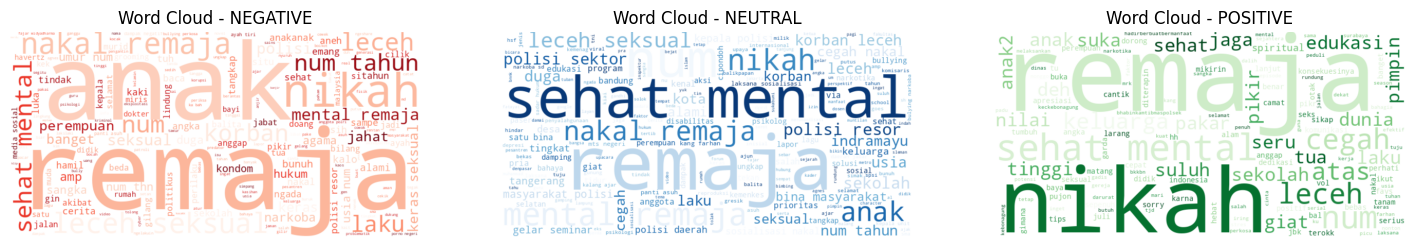

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load hasil klasifikasi
output_path = "/content/dataset_extracted/classified_dataset.csv"
df = pd.read_csv(output_path)

# Pastikan kolom "sentiment" dan "post" ada
if "sentiment" not in df.columns or "post" not in df.columns:
    raise ValueError("Kolom 'sentiment' atau 'post' tidak ditemukan dalam dataset!")

# --- Word Cloud Berdasarkan Sentimen ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sentiments = ["NEGATIVE", "NEUTRAL", "POSITIVE"]
colors = ["Reds", "Blues", "Greens"]  # Warna untuk tiap sentimen

for i, sentiment in enumerate(sentiments):
    text = " ".join(df[df["sentiment"] == sentiment]["post"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=colors[i]).generate(text)

    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Word Cloud - {sentiment}")

plt.show()


<ipython-input-14-da0db6fe8f9a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


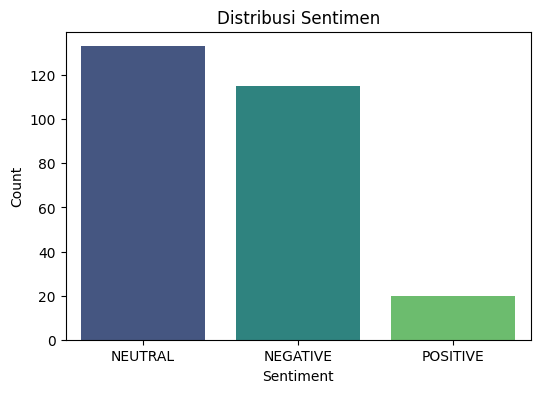

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah tiap kategori sentimen
sentiment_counts = df["sentiment"].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribusi Sentimen")
plt.show()


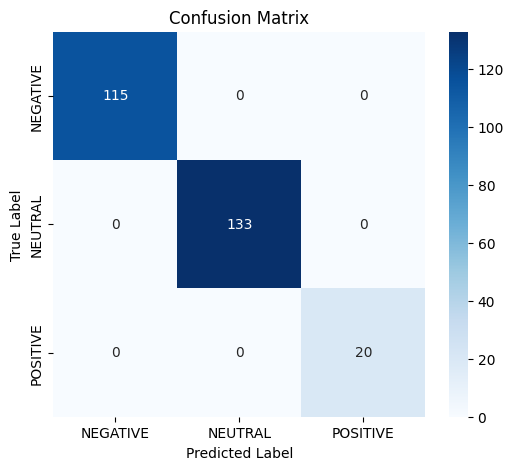

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Mapping label ke angka
label_map = {"NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2}
df["sentiment_num"] = df["sentiment"].map(label_map)

# Simulasi ground truth jika tidak ada (anggap hasil model sebagai ground truth)
df["true_sentiment_num"] = df["sentiment_num"]

# Buat confusion matrix
cm = confusion_matrix(df["true_sentiment_num"], df["sentiment_num"])

# Plot heatmap confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
